In [1]:
import json

In [3]:
path ="E:\\cncqleeds\\book\\pydata-book\\datasets\\bitly_usagov\\example.txt"

records = [json.loads(line) for line in open(path)]

In [4]:
type(records)

list

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
type(records[0])

dict

In [7]:
records[0]['ll']

[42.576698, -70.954903]

## 利用纯Python代码对时区'tz'进行计数

In [8]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

#### 以上报错说明并不是每条记录都有时区tz字段

In [10]:
ex_dict = {"a":1,"b":2}
print("a" in ex_dict)
print("c" in ex_dict)

True
False


In [16]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [12]:
time_zones[:20]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta']

#### tz字段存在空值情况

In [13]:
# 如果要去掉空值的情况，代码如下
# time_zones = [tz for tz in time_zones if tz != '']

In [17]:
time_zones[:20]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta']

In [18]:
len(time_zones)

3440

### 我们的任务是对时区进行计数，有多种方法

#### 方法一，使用标准的python库

In [19]:
def get_counts(sequence):
    counts = dict()
    for seq in sequence:
        if seq in counts:
            counts[seq] += 1
        else:
            counts[seq] = 1
            
    return counts

In [20]:
counts = get_counts(time_zones)

In [21]:
counts

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

### 方法二 使用collections 模块中的 defaultdict

In [22]:
from collections import defaultdict

In [23]:
def get_counts2(sequence):
    counts = defaultdict(int)
    
    for seq in sequence:
        counts[seq] += 1
    return counts

In [24]:
counts = get_counts2(time_zones)

In [25]:
counts

defaultdict(int,
            {'': 521,
             'Africa/Cairo': 3,
             'Africa/Casablanca': 1,
             'Africa/Ceuta': 2,
             'Africa/Johannesburg': 1,
             'Africa/Lusaka': 1,
             'America/Anchorage': 5,
             'America/Argentina/Buenos_Aires': 1,
             'America/Argentina/Cordoba': 1,
             'America/Argentina/Mendoza': 1,
             'America/Bogota': 3,
             'America/Caracas': 1,
             'America/Chicago': 400,
             'America/Chihuahua': 2,
             'America/Costa_Rica': 1,
             'America/Denver': 191,
             'America/Edmonton': 6,
             'America/Guayaquil': 2,
             'America/Halifax': 4,
             'America/Indianapolis': 20,
             'America/La_Paz': 1,
             'America/Lima': 1,
             'America/Los_Angeles': 382,
             'America/Managua': 3,
             'America/Mazatlan': 1,
             'America/Mexico_City': 15,
             'America/Monte

### 方法三 使用collections模块中的Counter类

In [29]:
from collections import Counter

In [30]:
counts = Counter(time_zones)

In [31]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 如果想得到钱10名的tz

In [26]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, key) for key, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [27]:
outputs = top_counts(counts)

In [28]:
outputs

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

### 方法四 用pandas对时区tz字段进行计数

In [32]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np

In [33]:
frame = DataFrame(records)

In [34]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [35]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [36]:
frame['tz'][:20]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                    NaN
14       America/New_York
15         Asia/Hong_Kong
16         Asia/Hong_Kong
17       America/New_York
18         America/Denver
19            Europe/Rome
Name: tz, dtype: object

In [37]:
test_list_dict = [{"a": 1, "b": 2, "c": 3},\
 {"a": 4, "b": 5, "c": 6},\
 {"a": 7, "b": 8, "c": 9}]

In [38]:
test_frame = DataFrame(test_list_dict)

In [39]:
test_frame

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [40]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
a    3 non-null int64
b    3 non-null int64
c    3 non-null int64
dtypes: int64(3)
memory usage: 152.0 bytes


In [42]:
test_frame['a'].value_counts()

7    1
1    1
4    1
Name: a, dtype: int64

In [43]:
frame['tz'].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
America/Puerto_Rico                 10
Asia/Hong_Kong                      10
Europe/Moscow                       10
Europe/Helsinki          

In [45]:
type(frame['tz'])

pandas.core.series.Series

### 利用matplotlib 绘图

#### 先用fillna函数替换tz字段的缺失值为（NA）


In [46]:
clean_tz = frame['tz'].fillna('Missing')

In [48]:
clean_tz[clean_tz == ''] = 'Unknown'

In [50]:
tz_counts = clean_tz.value_counts()

In [51]:
tz_counts

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Oslo                         10
Europe/Moscow            

### 画条形图

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

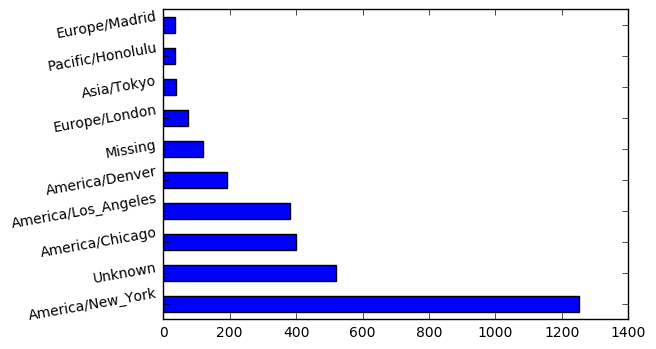

In [56]:
tz_counts[:10].plot(kind = 'barh',rot = 10)

In [57]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [58]:
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [63]:
results = Series([x.split()[0] for x in frame['a'].dropna()])

In [64]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [66]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [67]:
cframe = frame[frame['a'].notnull()]

In [69]:
cframe['a'][:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

### 按Windows和非Windows用户对时区统计信息进行分解

In [71]:
operating_system = np.where(cframe['a'].str.contains("Windows"),'Windows','Not Windows')

### 理解groupby的用法

In [72]:
by_tz_os = cframe.groupby(by=['tz',operating_system])

In [73]:
by_tz_os

In [74]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [75]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [76]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [77]:
agg_counts.sum(1)

tz
                                   521.0
Africa/Cairo                         3.0
Africa/Casablanca                    1.0
Africa/Ceuta                         2.0
Africa/Johannesburg                  1.0
Africa/Lusaka                        1.0
America/Anchorage                    5.0
America/Argentina/Buenos_Aires       1.0
America/Argentina/Cordoba            1.0
America/Argentina/Mendoza            1.0
America/Bogota                       3.0
America/Caracas                      1.0
America/Chicago                    400.0
America/Chihuahua                    2.0
America/Costa_Rica                   1.0
America/Denver                     191.0
America/Edmonton                     6.0
America/Guayaquil                    2.0
America/Halifax                      4.0
America/Indianapolis                20.0
America/La_Paz                       1.0
America/Lima                         1.0
America/Los_Angeles                382.0
America/Managua                      3.0
America/Mazat

In [78]:
agg_counts.sum(1).argsort()

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

In [79]:
count_subset = agg_counts.take(agg_counts.sum(1).argsort())

In [84]:
count_subset = count_subset[-10:]

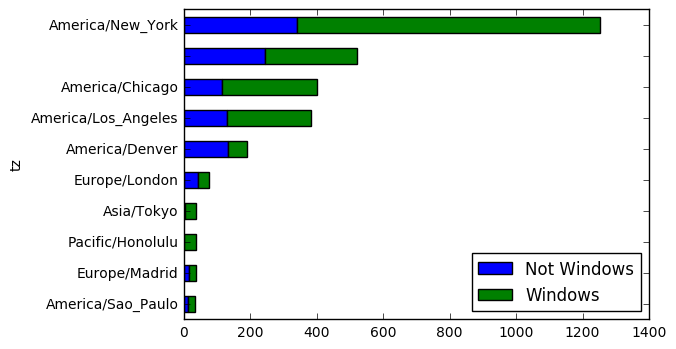

In [85]:
count_subset.plot(kind='barh',stacked=True)

In [86]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)

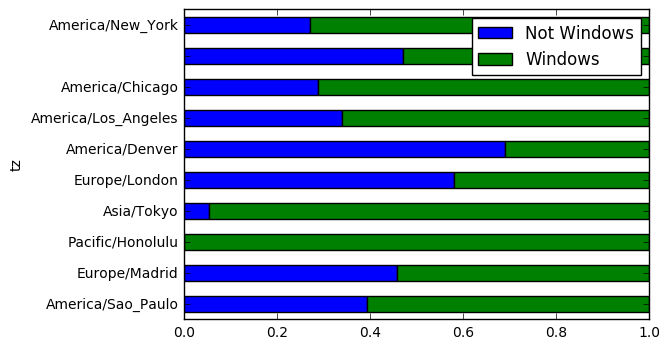

In [87]:
normed_subset.plot(kind='barh',stacked=True)

### 难点 DataFrame中的groupby函数

In [88]:
data = [['Li','M','Math',98],['Wang','F','Chinese',59],['Wang','F','Math',79],['Zhang','F','Math',89],['Li','M','English',68]]

In [89]:
data

[['Li', 'M', 'Math', 98],
 ['Wang', 'F', 'Chinese', 59],
 ['Wang', 'F', 'Math', 79],
 ['Zhang', 'F', 'Math', 89],
 ['Li', 'M', 'English', 68]]

In [92]:
test_frame = DataFrame(data,columns=['Name','Gender',"Course",'Score'])

In [93]:
test_frame

,Name,Gender,Course,Score
0,Li,M,Math,98
1,Wang,F,Chinese,59
2,Wang,F,Math,79
3,Zhang,F,Math,89
4,Li,M,English,68


In [105]:
test_frame.groupby('Name').mean()

,Score
Name,
Li,83
Wang,69
Zhang,89


In [101]:
test_frame.groupby(['Name','Course']).sum()

Score
Name  Course        
Li    English     68
      Math        98
Wang  Chinese     59
      Math        79
Zhang Math        89

In [104]:
test_frame.groupby(['Name','Course'])['Score'].sum()

Name   Course 
Li     English    68
       Math       98
Wang   Chinese    59
       Math       79
Zhang  Math       89
Name: Score, dtype: int64